# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q='
#test_cities = ['new york', 'san diego', 'baltimore']
#list
city_n = []

print('data collection beginning')
record_ct = 0
set_ct = 1

#enumerate - index number and the item itself - transforming anything that can be iterated and attaching an index value/id
#for city in cities: 
for i, city in enumerate(cities):
    response = requests.get(url +city).json()
    #dictionary
    data = {}
    #i% = 0 .. modulus - seeing if you can divide the number by whatever you include 
    #reset point - helps to make sure the loop is happening in groups of 50 
    if (i%50 == 0 and i >= 50):
        #ticking up on each count of 50
        set_ct +=1
        #reseting the value, not tickng up 
        record_ct = 0
    record_ct += 1
    print(f'Record: {record_ct} | Set: {set_ct} | City: {city}')
    
    try: 
        data ['city_name'] = response['name']
        data ['lat'] = response['coord']['lat']
        data ['lon'] = response['coord']['lon']
        data ['hum'] = response['main']['humidity']
        data ['cloud'] = response['clouds']['all']
        data ['wind'] = response['wind']['speed']
        data ['country'] = response['sys']['country']
        data['date'] = response['dt']
        city_n.append(data)
    except:
        print(f'skipping {city}')

#print(city_n)
    
#print(response)
#try and except - errors
#ValueError: built-in operation or function receives an argument that has the right type but inappropriate value 
#EOFError: when a built in function hits an end-of-file conidtion without reading in data

data collection beginning
Record: 1 | Set: 1 | City: grand river south east
skipping grand river south east
Record: 2 | Set: 1 | City: thinadhoo
Record: 3 | Set: 1 | City: mar del plata
Record: 4 | Set: 1 | City: upernavik
Record: 5 | Set: 1 | City: chagda
skipping chagda
Record: 6 | Set: 1 | City: kruisfontein
Record: 7 | Set: 1 | City: hermanus
Record: 8 | Set: 1 | City: bethel
Record: 9 | Set: 1 | City: chepareria
Record: 10 | Set: 1 | City: chuy
Record: 11 | Set: 1 | City: coquimbo
Record: 12 | Set: 1 | City: ilulissat
Record: 13 | Set: 1 | City: cape town
Record: 14 | Set: 1 | City: koumra
Record: 15 | Set: 1 | City: atuona
Record: 16 | Set: 1 | City: xuddur
Record: 17 | Set: 1 | City: formoso do araguaia
skipping formoso do araguaia
Record: 18 | Set: 1 | City: sur
Record: 19 | Set: 1 | City: maldonado
Record: 20 | Set: 1 | City: amderma
skipping amderma
Record: 21 | Set: 1 | City: hualmay
Record: 22 | Set: 1 | City: atambua
Record: 23 | Set: 1 | City: fortuna
Record: 24 | Set: 1 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#OPTION 1
summary = pd.DataFrame(city_n)
#do not want to include the index in the file
summary.to_csv(output_data_file, index=False)

In [5]:
#Importing into CSV (pandas writing functions)
data_csv = pd.read_csv(r'output_data\cities.csv')
data_csv

,city_name,lat,lon,hum,cloud,wind,country,date
0,Thinadhoo,0.53,72.93,71,15,13.06,MV,1585232869
1,Mar del Plata,-38.00,-57.56,82,75,14.99,AR,1585232822
2,Upernavik,72.79,-56.15,85,99,12.68,GL,1585232869
3,Kruisfontein,-34.00,24.73,54,0,19.64,ZA,1585232870
4,Hermanus,-34.42,19.23,52,58,10.38,ZA,1585232870
...,...,...,...,...,...,...,...,...
536,Barra Patuca,15.80,-84.28,78,4,9.40,HN,1585232951
537,Voh,-20.97,164.70,82,2,6.33,NC,1585232951
538,Gizo Government Station,-8.10,156.84,76,100,1.14,SB,1585232951
539,Kismayo,-0.36,42.55,71,87,12.28,SO,1585232952


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Humidity Plot

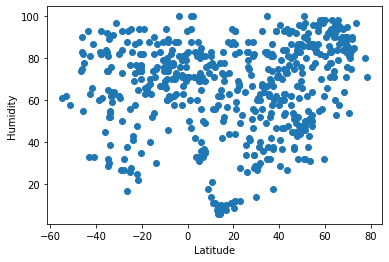

In [6]:
x_values = data_csv['lat']
y_values = data_csv['hum']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

#### Latitude vs. Cloudiness Plot

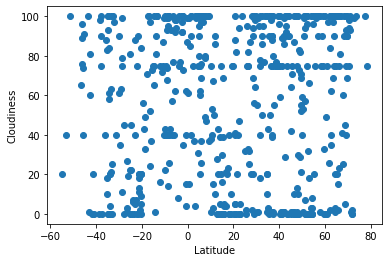

In [7]:
x_values = data_csv['lat']
y_values = data_csv['cloud']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

#### Latitude vs. Wind Speed Plot

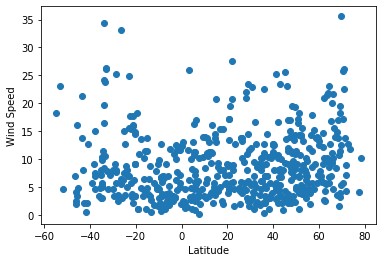

In [8]:
x_values = data_csv['lat']
y_values = data_csv['wind']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

## Linear Regression

In [10]:
# Hemisphere data
north = data_csv['lat']>=0
south = data_csv['lat']<0

In [15]:
x_values = data_csv['lat']>=0
y_values = data_csv['hum']>=0

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

R squard: 0.0


In [16]:
x_values = data_csv['lat']<0
y_values = data_csv['hum']<0

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

R squard: 0.0


ValueError: Image size of 1993x71802 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


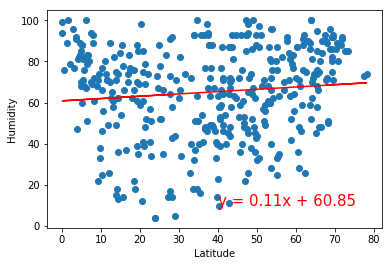

In [111]:
## X Values & Y Values
x_values = 
y_values = 

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


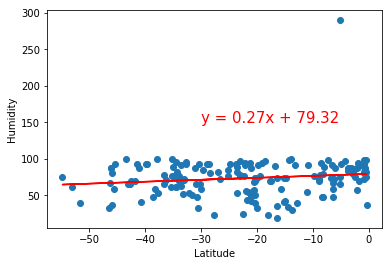

In [112]:
## X Values & Y Values
x_values = 
y_values = 

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


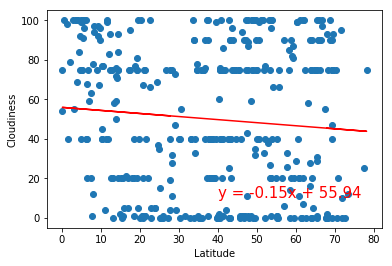

In [115]:
## X Values & Y Values
x_values = 
y_values = 

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


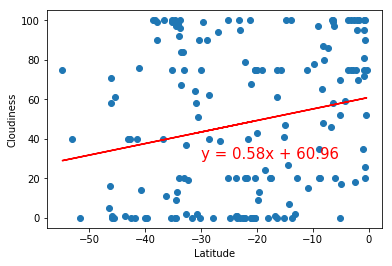

In [114]:
## X Values & Y Values
x_values = 
y_values = 

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


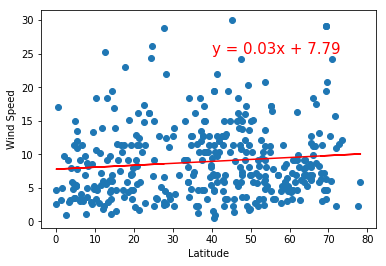

In [117]:
## X Values & Y Values
x_values = 
y_values = 

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


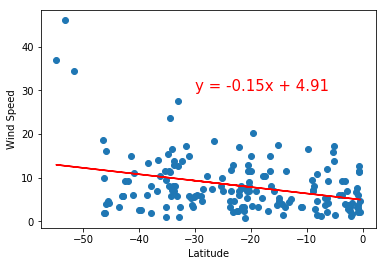

In [116]:
## X Values & Y Values
x_values = 
y_values = 

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude)
plt.ylabel('Wind Speed')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

In [ ]:
## X Values & Y Values
x_values = 
y_values = 

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()